In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 
import tabulate

In [2]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [3]:
#partition Data
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [4]:
maxDegree = 20
numModels = 10

bias2Arr = np.zeros(maxDegree)
varianceArr = np.zeros(maxDegree)
mseArr = np.zeros(maxDegree)

y_res_arr = np.zeros(maxDegree)

for deg in range(maxDegree): 
    predMatrix = np.zeros((numModels,len(testData[:, 0])))
    for i in range(numModels): #should be 0, 10
        poly = PolynomialFeatures(degree = deg+1)
        # reshaping data
        X_train = poly.fit_transform(trainData[i][:, 0].reshape(-1, 1))
        y_train = trainData[i][:, 1].reshape(-1, 1)
        X_test = poly.fit_transform(testData[:, 0].reshape(-1, 1))
        y_test = testData[:, 1].reshape(-1, 1)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        
        y_pred = reg.predict(X_test)
        predMatrix[i] = y_pred.reshape( len(y_pred))
        mseArr[deg] += np.mean(np.square(y_pred - y_test))

    mseArr[deg] /= numModels
    bias2Arr[deg] = np.mean( (np.mean(predMatrix, axis = 0) - testData[:, 1] ) ** 2 ) 
    varianceArr[deg] = np.mean(np.var(predMatrix, axis = 0))

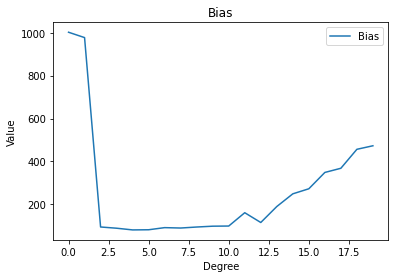

In [5]:
# plt.plot(varianceArr)
plt.plot(np.sqrt(bias2Arr), label = "Bias")
# plt.plot(interceptArr)
# plt.plot(mseArr)
plt.title('Bias')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

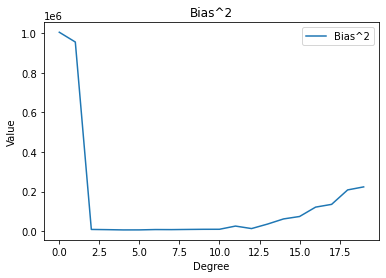

In [6]:
# plt.plot(varianceArr)
plt.plot(bias2Arr, label = "Bias^2")
# plt.plot(interceptArr)
# plt.plot(mseArr)
plt.title('Bias^2')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

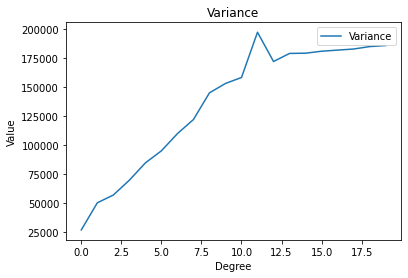

In [7]:
plt.plot(varianceArr, label = "Variance")
plt.title('Variance')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

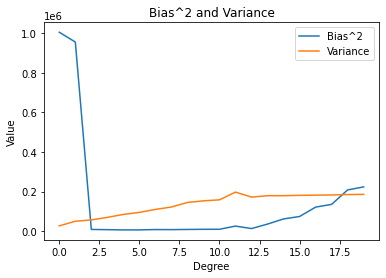

In [8]:
plt.plot(bias2Arr, label = "Bias^2")
plt.plot(varianceArr, label = "Variance")
plt.title('Bias^2 and Variance')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()


In [9]:
# irreducible error

irredErrArr = mseArr - bias2Arr - varianceArr

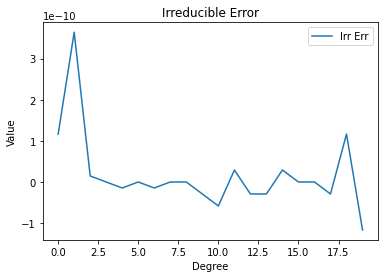

In [10]:

plt.plot(irredErrArr, label = 'Irr Err')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.title('Irreducible Error')
# plt.plot(mseArr)
# plt.plot(varianceArr)
# plt.plot(bias2Arr)
plt.legend()
plt.show()

In [11]:
tableDF = pd.DataFrame({
    'degree': range(1, 21),
    'bias': np.sqrt(bias2Arr),
    'variance': varianceArr,
})

In [12]:
print(tableDF)

    degree         bias       variance
0        1  1002.277151   26925.478029
1        2   977.348686   50316.376146
2        3    94.444775   57031.717742
3        4    88.702821   69826.331185
4        5    80.781012   84744.391093
5        6    81.529635   95153.919230
6        7    91.416555  109986.119318
7        8    89.596228  122150.653778
8        9    94.281684  145189.486535
9       10    98.145245  153283.002930
10      11    98.869333  158444.851799
11      12   160.983493  197481.975651
12      13   115.362255  172234.500049
13      14   189.789847  179197.406506
14      15   249.004150  179406.461644
15      16   272.591071  181107.290407
16      17   348.711315  182063.454770
17      18   368.164420  183012.483145
18      19   456.606175  185107.514799
19      20   473.036094  186025.823459
